# K Cross Fold Validation

In [82]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()
x,y =iris.data,iris.target
classifier = KNeighborsClassifier()

In [83]:
# First step Shuffling of data           
import numpy as np
rng = np.random.RandomState(0)
permutation = rng.permutation((len(x)))# shuffling Randomly of Data
x , y = x[permutation],y[permutation]

In [84]:
k=5
n_samples = len(x)
fold_size = n_samples//k
scores = []
masks = []
for fold in range(k):
    test_mask = np.zeros(n_samples,dtype = bool)
    test_mask[fold * fold_size :(fold+1)*fold_size]=True
    masks.append(test_mask)
    x_test,y_test = x[test_mask],y[test_mask]
    x_train , y_train = x[~test_mask],y[~test_mask]
    classifier.fit(x_train,y_train)
    scores.append(classifier.score(x_test,y_test))

In [85]:
print(scores)
print(np.mean(scores))

[0.9666666666666667, 0.9, 1.0, 1.0, 0.9333333333333333]
0.96


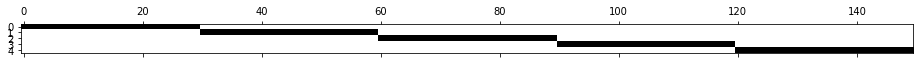

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(masks,cmap = 'gray_r')

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
cv = ShuffleSplit(n_splits=5,test_size=.2)
scores = cross_val_score(classifier,x,y,cv=cv)
print(scores)
print(np.mean(scores))

[1. 1. 1. 1. 1.]
1.0


In [88]:
def plot_cv(cv,features,labels):
    masks=[]
    for train ,test in cv.split(features,labels):
        mask = np.zeros(len(labels),dtype=bool)
        mask[test]=1;
        masks.append(test)
        
    plt.matshow(masks,cmap='gray_r')

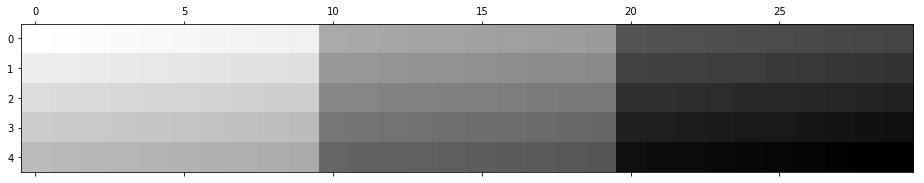

In [89]:
plot_cv(StratifiedKFold(n_splits=5),iris.data,iris.target)

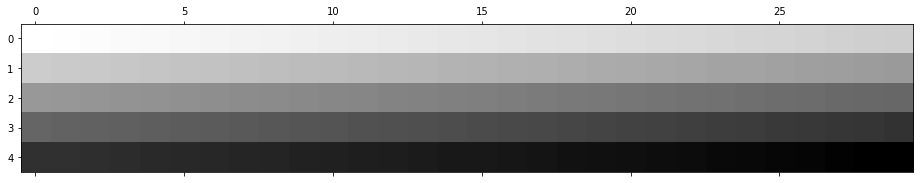

In [90]:
from sklearn.model_selection import KFold
plot_cv(KFold(n_splits=5),iris.data,iris.target)